### Objective: Analyze student enrollment in courses.

#### Problem Statement: Predict possible student enrollment as per organization and course.
1. What are most popular courses according to sutdent enrollment?
2. What are most popular orgnizations according to sutdent enrollment?
3. What type of certifications have most student enrollment?
4. Most rated courses, are most rated courses bring more students?
5. How difficulty level of course related to student enrollment?

 #### Dataset source and information
 
 https://www.kaggle.com/siddharthm1698/coursera-course-dataset/data?select=coursea_data.csv

This dataset contains mainly 7 columns and 890 course data. The detailed description:

1. Unnamed: 0: Just number to identify dataset
2. course_title : Contains the course title.
3. course_organization : It tells which organization is conducting the courses.
4. course_Certificate_type : It has details about what are the different certifications available in courses.
5. course_rating : It has the ratings associated with each course.
6. course_difficulty : It tells about how difficult or what is the level of the course.
7. course_students_enrolled : It has the number of students that are enrolled in the course.

#### Import Libraries

In [138]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#import seaborn as sns
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


from sklearn.metrics import accuracy_score

### Load Dataset

In [139]:
# Function to load data as dataframe
def load_file(file):
    '''loads csv to pd dataframe'''
    return pd.read_csv(file)

In [140]:
# Data source
data_file = '/Coursera project/coursea_data.csv'

In [141]:
# Load data as Dataframe
coursera_df = load_file(data_file)
coursera_df.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


### Exploratry analysis of dataset

In [142]:
# Check if any duplicate value in Unnamed column, and decide if it has significance in analysis.
print(coursera_df['Unnamed: 0'].value_counts().sum())
# Dropped first column (Unnamed: 0:) as it doesn't any analysis significance, it is Just number to identify dataset
coursera_df = coursera_df.drop('Unnamed: 0', axis=1)
coursera_df.head()

891


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [143]:
# print columns in dataset
coursera_df.columns

Index(['course_title', 'course_organization', 'course_Certificate_type',
       'course_rating', 'course_difficulty', 'course_students_enrolled'],
      dtype='object')

In [144]:
#Renaming column names
coursera_df = coursera_df.rename(columns={'course_title':'Course_Title', 'course_organization': 'Organization', 'course_Certificate_type' : 'Course_Type', 'course_rating':'Course_Rating', \
                                
                                          'course_difficulty': 'Difficulty_Level', 'course_students_enrolled': 'Enrolled_Students'})

coursera_df.head()

,Course_Title,Organization,Course_Type,Course_Rating,Difficulty_Level,Enrolled_Students
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [145]:
# Print dataframe information
coursera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Course_Title         891 non-null object
Organization         891 non-null object
Course_Type          891 non-null object
Course_Rating        891 non-null float64
Difficulty_Level     891 non-null object
Enrolled_Students    891 non-null object
dtypes: float64(1), object(5)
memory usage: 41.8+ KB


In [146]:
# print updated column names
coursera_df.columns

Index(['Course_Title', 'Organization', 'Course_Type', 'Course_Rating',
       'Difficulty_Level', 'Enrolled_Students'],
      dtype='object')

In [147]:
# function to convert course_students_enrolled to float for further analysis
def extract_number(list):
    new_list = []
    for row in list:
        if 'k' in row:
            row = re.findall(r'[\d\.\d]+', row)
            row = float(row[0])
            row = row * 1000
        elif 'm' in row:
            row = re.findall(r'[\d\.\d]+', row)
            row = float(row[0])
            row = row * 1000000
        else:
            row = float(row[0]) 
            
        new_list.append(row)
    return new_list 


In [148]:
# Convert course_students_enrolled to float
students = extract_number(coursera_df['Enrolled_Students'])

In [149]:
# Add updated students column to dataframe and print new dataframe head
coursera_df['Students'] = students
coursera_df.head()

,Course_Title,Organization,Course_Type,Course_Rating,Difficulty_Level,Enrolled_Students,Students
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000.0


In [150]:
# Save new dataframe to csv file
coursera_df.to_csv('/Coursera project/coursera_new.csv')                   

In [151]:
# Check any duplicate row in dataframe
coursera_df.duplicated().sum()

0

In [152]:
# Check null values in columns
coursera_df.isnull().any()

Course_Title         False
Organization         False
Course_Type          False
Course_Rating        False
Difficulty_Level     False
Enrolled_Students    False
Students             False
dtype: bool

There is no null or duplicated row in dataset. For further analysis, detect language of course title and add language columns in dataframe, to analyze which student enrollment based on course language.

In [153]:
import langdetect
coursera_df['Language'] = coursera_df['Course_Title'].apply(lambda x: langdetect.detect(x))
coursera_df['Language'].value_counts()

en    724
es     45
fr     16
it     15
ru     14
de     14
nl     10
ro      8
da      8
ca      7
no      7
pt      6
tl      5
id      4
af      3
hu      1
lt      1
bg      1
hr      1
cy      1
Name: Language, dtype: int64

In [154]:
coursera_df.dtypes

Course_Title          object
Organization          object
Course_Type           object
Course_Rating        float64
Difficulty_Level      object
Enrolled_Students     object
Students             float64
Language              object
dtype: object

In [155]:
coursera_df.head()

,Course_Title,Organization,Course_Type,Course_Rating,Difficulty_Level,Enrolled_Students,Students,Language
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300.0,en
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000.0,en
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000.0,en
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000.0,en
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000.0,en


In [156]:
# Print Summary statistics of number columns in Dataframe
coursera_df.describe(include = [np.number])

,Course_Rating,Students
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


In [157]:
# Print Summary statistics of object columns in Dataframe
coursera_df.describe(include = ['O'])

,Course_Title,Organization,Course_Type,Difficulty_Level,Enrolled_Students,Language
count,891,891,891,891,891,891
unique,888,154,3,4,205,20
top,Developing Your Musicianship,University of Pennsylvania,COURSE,Beginner,120k,en
freq,2,59,582,487,22,724


As per above summary:
888 courses offered by 154 orgnizations in 19 languages.

In [158]:
# Check invalid data, if any row has number of students 0 or negative
coursera_df.loc[coursera_df.Students <= 0].count()

Course_Title         0
Organization         0
Course_Type          0
Course_Rating        0
Difficulty_Level     0
Enrolled_Students    0
Students             0
Language             0
dtype: int64

In [159]:
# Print number of unique course ratings
coursera_df['Course_Rating'].nunique()

14

In [160]:
# Print top ten courses according to students enrollment
top_10_courses = coursera_df.nlargest(10,'Students')
top_10_courses

,Course_Title,Organization,Course_Type,Course_Rating,Difficulty_Level,Enrolled_Students,Students,Language
564,Machine Learning,Stanford University,COURSE,4.9,Mixed,3.2m,3200000.0,en
815,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m,2500000.0,en
688,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m,1500000.0,cy
674,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1.3m,1300000.0,en
196,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830k,830000.0,it
129,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790k,790000.0,en
261,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760k,760000.0,en
765,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750k,750000.0,en
199,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740k,740000.0,en
211,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690k,690000.0,nl


According to above table top categories students enrolled in are : 
1. Out of 10, 6 Courses related to data Science: Machine Learning, Data Science, Python, Deep Learning
2. Self help: The Science of Well-Being
3. Career Success

In [161]:
fig = px.pie(top_10_courses, values='Students', names='Course_Title', title= 'Top 10 courses students enrolled in:')
fig.show()

In [162]:
fig = px.pie(top_10_courses, values='Students', names='Organization', title='Orgnizations with most student enrollment')
fig.show()

In [163]:
# Least enrolled student courses
least_10_courses = coursera_df.nsmallest(10,'Students')
least_10_courses

,Course_Title,Organization,Course_Type,Course_Rating,Difficulty_Level,Enrolled_Students,Students,Language
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5k,1500.0,es
96,Blockchain Revolution in Financial Services,INSEAD,SPECIALIZATION,4.6,Beginner,1.6k,1600.0,en
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6k,1600.0,en
406,Healthcare Law,University of Pennsylvania,SPECIALIZATION,4.7,Intermediate,1.7k,1700.0,en
423,"Identifying, Monitoring, and Analyzing Risk an...",(ISC)²,COURSE,4.9,Beginner,1.7k,1700.0,en
810,The Pronunciation of American English,"University of California, Irvine",SPECIALIZATION,4.6,Beginner,1.7k,1700.0,en
280,Esports,"University of California, Irvine",SPECIALIZATION,4.5,Beginner,1.8k,1800.0,es
93,Blended Language Learning: Design and Practice...,University of Colorado Boulder,COURSE,4.8,Intermediate,1.9k,1900.0,en
425,Implementing RPA with Cognitive Automation and...,Automation Anywhere,SPECIALIZATION,4.6,Beginner,2.2k,2200.0,en
459,International Security Management,Erasmus University Rotterdam,COURSE,4.5,Beginner,2.2k,2200.0,en


As per above table, even though courses with less student enrollment has above average rating (4.5 or above) still student enrollment around 2k. Below pie chart representation of least enrolled students courses.

In [164]:
fig = px.pie(least_10_courses, values='Students', names='Course_Title', title= '10 courses with least sutdent enrollment:')
fig.show()

In [165]:
# top rated courses
top_10_ratings = coursera_df.nlargest(10,'Course_Rating')
top_10_ratings

,Course_Title,Organization,Course_Type,Course_Rating,Difficulty_Level,Enrolled_Students,Students,Language
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.0,Beginner,1.5k,1500.0,es
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.0,Intermediate,1.6k,1600.0,en
36,Agile и Scrum в работе над проектами и продуктами,ScrumTrek,COURSE,4.9,Beginner,12k,12000.0,ru
40,American Contract Law I,Yale University,COURSE,4.9,Beginner,18k,18000.0,en
61,Aprendiendo a aprender: Poderosas herramientas...,University of California San Diego,COURSE,4.9,Beginner,180k,180000.0,es
65,Arizona State University TESOL,Arizona State University,PROFESSIONAL CERTIFICATE,4.9,Beginner,150k,150000.0,en
70,Aspectos básicos de la planificación y la gest...,University of Virginia,COURSE,4.9,Beginner,10k,10000.0,es
82,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,COURSE,4.9,Mixed,210k,210000.0,en
98,Boosting Creativity for Innovation,HEC Paris,COURSE,4.9,Beginner,9.5k,9500.0,en
99,"Brand Management: Aligning Business, Brand and...",London Business School,COURSE,4.9,Beginner,57k,57000.0,en


According to above dataframe, most rated courses may not drive more student enrollment. Even though top 10 high rated courses not in data science discipline, but most of the student enrollment in data science and programming courses.

In [166]:
# bar graph showing number of students enrolled based on course rating and difficulty level of course
fig = px.bar(coursera_df, x='Course_Rating', y='Students', color='Difficulty_Level')
fig.show()

In [167]:
# Pie chart showing student enrollment based on difficulty level
fig = px.pie(coursera_df, values='Students', names='Difficulty_Level')
fig.show()

According to above pie chart almost 50% students enrolled in beginner level, and then 31% mixed level. 

In [168]:
# Bar graph course language v/s students
fig = px.bar(coursera_df, x='Language', y='Students')
fig.show()

Based above bar graph, more than 60M students enrolled in courses which are in english language. Recommendatoin as per above chart: Coursera might need to bring more content in other languages, or permote courses in other languages.

In [169]:
# Pie chart to show enrolled students based on course type
fig = px.pie(coursera_df, values='Students', names='Course_Type')
fig.show()

As per above chart, most popular type is Course and least popular type is professional certifcate.

In [170]:
# pie chart to show course rating based on course type
fig = px.pie(coursera_df, values='Course_Rating', names='Course_Type')
fig.show()

Above 2 pie charts are similar, most student enrollment in type course and most number of ratings are also in type course.

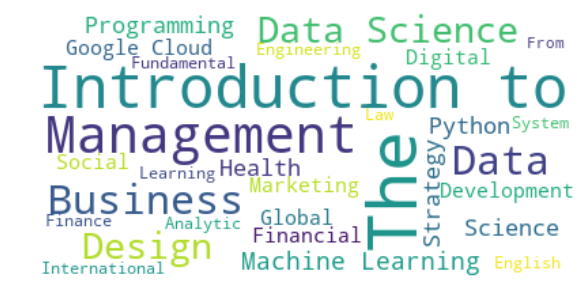

In [171]:
# Word cloud of mostly used in words in course title
text = " ".join(title for title in coursera_df.Course_Title)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white").generate(text)

# Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

According to above word cloud, mostly used words in courses titles are Machine leaniing, Data, Design, Management, Business. It means majority of courses related to these discipline in coursera.  

In [172]:
# Function to count total courses related to a particular domain 
def dscourses(dataframe, alist):
    DScourse = 0
    for course in alist:
        for title in coursera_df.Course_Title: 
            if course in title:
                DScourse = DScourse + 1
    return DScourse   

In [173]:
# Course titles dictionary 
coursera_df.Course_Title.value_counts().to_dict()

{'Developing Your Musicianship': 2,
 'Machine Learning': 2,
 'Marketing Digital': 2,
 "L'excellence opérationnelle en pratique": 1,
 'What future for education?': 1,
 'Drug Discovery': 1,
 'Writing in the Sciences': 1,
 'Introduction to Typography': 1,
 'Introduction to Dental Medicine': 1,
 'Software Product Management': 1,
 'Data Analysis with Python': 1,
 'Software Processes and Agile Practices': 1,
 'Econometrics: Methods and Applications': 1,
 'User Interface Design': 1,
 'Perfect Tenses and Modals': 1,
 'From Data to Insights with Google Cloud Platform': 1,
 'Agile Development': 1,
 "The Manager's Toolkit: A Practical Guide to Managing People at Work": 1,
 'Essential Google Cloud Infrastructure: Foundation': 1,
 'Financial Engineering and Risk Management Part I': 1,
 'Introduction to Trading, Machine Learning & GCP': 1,
 'Optical Engineering': 1,
 'Finance for Non-Finance Professionals': 1,
 'Becoming a Sports Agent': 1,
 'Foundations of Business Strategy': 1,
 'Communication Ski

Understanding student enrollment courses related to data science, Management and others

In [174]:
# Count of Data Science courses
DSlist = ['Data', 'Data Science', 'Python', 'Machine Learning', 'Analytic', 'Analytics', 'Programmning', 'Statistics', 'Deep Learning', 'R Programming' 'AI', 'Excel', 'VBA']
coursera_df.iloc[:, 0].head()

dscourses(coursera_df, DSlist)

216

In [175]:
# Count of Management courses
Managementlist = ['Management', 'Business', 'Design', 'Finance', 'Marketing', 'Financial', 'Strategy']
coursera_df.iloc[:, 0].head()

dscourses(coursera_df, Managementlist)

190

In [176]:
# count of generic courses based on words in word cloud
genrallist = ['global', 'international', 'Law', 'Social', 'Fundamental', 'introduction']
coursera_df.iloc[:, 0].head()

dscourses(coursera_df, genrallist)

69

In [177]:
search = 'data'
coursera_df["count"]= coursera_df["Course_Title"].str.count(search, re.I)
coursera_df.head(10)
#coursera_df["count"].value_counts()

,Course_Title,Organization,Course_Type,Course_Rating,Difficulty_Level,Enrolled_Students,Students,Language,count
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k,5300.0,en,0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k,17000.0,en,1
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k,130000.0,en,1
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k,91000.0,en,0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k,320000.0,en,0
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k,39000.0,en,0
6,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k,350000.0,en,0
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k,2400.0,en,0
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k,61000.0,en,0
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k,12000.0,it,0


Machine learning to predict student enrollment based on course type

In [179]:
course_dummies = pd.get_dummies(data=coursera_df, columns=['Course_Type', 'Difficulty_Level'])
print(course_dummies.columns)
course_dummies.head()

Index(['Course_Title', 'Organization', 'Course_Rating', 'Enrolled_Students',
       'Students', 'Language', 'count', 'Course_Type_COURSE',
       'Course_Type_PROFESSIONAL CERTIFICATE', 'Course_Type_SPECIALIZATION',
       'Difficulty_Level_Advanced', 'Difficulty_Level_Beginner',
       'Difficulty_Level_Intermediate', 'Difficulty_Level_Mixed'],
      dtype='object')


,Course_Title,Organization,Course_Rating,Enrolled_Students,Students,Language,count,Course_Type_COURSE,Course_Type_PROFESSIONAL CERTIFICATE,Course_Type_SPECIALIZATION,Difficulty_Level_Advanced,Difficulty_Level_Beginner,Difficulty_Level_Intermediate,Difficulty_Level_Mixed
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,4.7,5.3k,5300.0,en,0,0,0,1,0,1,0,0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,4.7,17k,17000.0,en,1,1,0,0,0,0,1,0
2,A Crash Course in Data Science,Johns Hopkins University,4.5,130k,130000.0,en,1,1,0,0,0,0,0,1
3,A Law Student's Toolkit,Yale University,4.7,91k,91000.0,en,0,1,0,0,0,0,0,1
4,A Life of Happiness and Fulfillment,Indian School of Business,4.8,320k,320000.0,en,0,1,0,0,0,0,0,1


In [180]:
# Define target variable and independent variables
X = course_dummies[['Course_Type_PROFESSIONAL CERTIFICATE', 'Course_Type_SPECIALIZATION',
       'Difficulty_Level_Advanced']]
y = course_dummies['Students']
print(X.shape, y.shape)
X.head()

(891, 3) (891,)


,Course_Type_PROFESSIONAL CERTIFICATE,Course_Type_SPECIALIZATION,Difficulty_Level_Advanced
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [181]:
# split data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [182]:
X_train.shape, y_train.shape

((712, 3), (712,))

In [183]:
#model = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100)

In [184]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [185]:
y_pred = model.predict(X_test)

In [186]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.00558659217877095


Tried random forest and decision tree, accuracy is too low. Looks like this data can't used to predict student enrollment. Above analysis gives better understanding what are the courses are more popular and it can be helpful to decide which domain needs more courses and can give idea of expected student enrollment.   